# INFS3208 Individual Project (Type II: Big Data Queries )

## Aviation Accidents and Incidents

In [1]:
!pip install omniplot
from pyspark import SparkConf
from pyspark.context import SparkContext
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql.types import * 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
spark = SparkSession.builder.appName("47647558_Individual_Project").getOrCreate()

In [2]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

## Data cleaning

### airlines_accidents.csv

In [3]:
airline_accidents = StructType([\
		StructField("event_id", StringType(), False), \
		StructField("event_type", StringType(), True), \
		StructField("accident_number", StringType(), True), \
		StructField("event_date", StringType(), True), \
		StructField("location", StringType(), True), \
		
		StructField("country", StringType(), True), \
		StructField("latitude", StringType(), True), \
		StructField("longitude", StringType(), True), \
		StructField("airport_code", StringType(), True), \
		StructField("airport_name", StringType(), True), \
		
		StructField("injury_severity", StringType(), True), \
		StructField("aircraft_damage", StringType(), True), \
		StructField("aircraft_category", StringType(), True), \
		StructField("aircraft_registration_number", StringType(), True), \
		StructField("aircraft_make", StringType(), True), \
		
		StructField("aircraft_model", StringType(), True), \
		StructField("amateur_built", StringType(), True), \
		StructField("number_of_engines", StringType(), True), \
		StructField("engine_type", StringType(), True), \
		StructField("far_description", StringType(), True), \
		
		StructField("schedule", StringType(), True), \
		StructField("purpose_of_flight", StringType(), True), \
		StructField("air_carrier", StringType(), True), \
		StructField("total_fatal_injuries", IntegerType(), True), \
		StructField("total_serious_injuries", IntegerType(), True), \
		
		StructField("total_minor_injuries", IntegerType(), True), \
		StructField("total_uninjured", IntegerType(), True), \
		StructField("flight_plan_filed_code", StringType(), True), \
		StructField("broad_phase_of_flight", StringType(), True), \
		StructField("report_publication_date", StringType(), True), \
	])

In [4]:
path1 = "hdfs://namenode:8020/infs3208/airline_accidents.csv"
df1 = spark.read.option("header", True).schema(airline_accidents).csv(path1)
#df1.show(truncate=False)
df1.printSchema()

root
 |-- event_id: string (nullable = true)
 |-- event_type: string (nullable = true)
 |-- accident_number: string (nullable = true)
 |-- event_date: string (nullable = true)
 |-- location: string (nullable = true)
 |-- country: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- airport_code: string (nullable = true)
 |-- airport_name: string (nullable = true)
 |-- injury_severity: string (nullable = true)
 |-- aircraft_damage: string (nullable = true)
 |-- aircraft_category: string (nullable = true)
 |-- aircraft_registration_number: string (nullable = true)
 |-- aircraft_make: string (nullable = true)
 |-- aircraft_model: string (nullable = true)
 |-- amateur_built: string (nullable = true)
 |-- number_of_engines: string (nullable = true)
 |-- engine_type: string (nullable = true)
 |-- far_description: string (nullable = true)
 |-- schedule: string (nullable = true)
 |-- purpose_of_flight: string (nullable = true)
 |-- air_

In [5]:
df1_p = df1.toPandas()
df1_p

,event_id,event_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,flight_plan_filed_code,broad_phase_of_flight,report_publication_date
0,20080125X00106,Accident,SEA08CA056,12/31/2007,"Santa Ana, CA",United States,33.675556,-117.868056,SNA,John Wayne - Orange County,...,None,Instructional,None,NaN,NaN,NaN,2.0,VMC,LANDING,02/28/2008
1,20080206X00141,Accident,CHI08WA075,12/31/2007,"Guernsey, United Kingdom",United Kingdom,49.435,-2.600278,None,None,...,None,Unknown,None,NaN,NaN,NaN,1.0,None,None,02/06/2008
2,20080129X00122,Accident,CHI08CA057,12/30/2007,"Alexandria, MN",United States,45.866111,-95.394444,AXN,Chandler Field Airport,...,None,Personal,None,NaN,NaN,NaN,1.0,VMC,TAKEOFF,02/28/2008
3,20080114X00045,Accident,LAX08FA043,12/30/2007,"Paso Robles, CA",United States,35.542222,-120.522778,PRB,Paso Robles Airport,...,None,Personal,None,1.0,NaN,NaN,NaN,VMC,MANEUVERING,06/20/2014
4,20080109X00032,Accident,NYC08FA071,12/30/2007,"Cherokee, AL",United States,34.688611,-87.92,None,None,...,None,Other Work Use,None,3.0,0.0,0.0,0.0,VMC,MANEUVERING,01/15/2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150954,24237,None,NYC65I0127,None,"BRADFORD, PA",United States,None,None,None,None,...,None,None,None,0.0,0.0,0.0,0.0,None,None,None
150955,24243,None,LAX78DUJ68,None,"WINSLOW, AZ",United States,None,None,None,None,...,None,None,None,0.0,0.0,0.0,0.0,None,None,None
150956,24242,None,MIA74DLD77,None,"SARASOTA, FL",United States,None,None,None,None,...,None,None,None,0.0,0.0,0.0,0.0,None,None,None
150957,24239,None,LAX68F0032,None,"SCOTTSDALE, AZ",United States,None,None,None,None,...,None,None,None,0.0,0.0,0.0,0.0,None,None,None


In [6]:
df1.printSchema()

root
 |-- event_id: string (nullable = true)
 |-- event_type: string (nullable = true)
 |-- accident_number: string (nullable = true)
 |-- event_date: string (nullable = true)
 |-- location: string (nullable = true)
 |-- country: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- airport_code: string (nullable = true)
 |-- airport_name: string (nullable = true)
 |-- injury_severity: string (nullable = true)
 |-- aircraft_damage: string (nullable = true)
 |-- aircraft_category: string (nullable = true)
 |-- aircraft_registration_number: string (nullable = true)
 |-- aircraft_make: string (nullable = true)
 |-- aircraft_model: string (nullable = true)
 |-- amateur_built: string (nullable = true)
 |-- number_of_engines: string (nullable = true)
 |-- engine_type: string (nullable = true)
 |-- far_description: string (nullable = true)
 |-- schedule: string (nullable = true)
 |-- purpose_of_flight: string (nullable = true)
 |-- air_

In [7]:
# dropping unnecessary columns 
df1 = df1.drop("accident_number","latitude", "longitude", "airport_code", "airport_name", "aircraft_registration_number", "far_description", "schedule", "air_carrier", "aircraft_category", "report_publication_date")

# dropping duplicates
df1 = df1.dropDuplicates()

# dropping rows that have null values
df1 = df1.na.drop(subset=["event_type","location","country","aircraft_damage",'aircraft_make', 'aircraft_model', 'amateur_built', 'engine_type', 'purpose_of_flight', 'flight_plan_filed_code', 'broad_phase_of_flight', 'number_of_engines','total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured'])

# keeping only aviation accident record which took place in United States
df1 = df1.filter(df1["country"] == 'United States')

# keeping only the rows which event_type is accident 
df1 = df1.filter(df1["event_type"] == 'Accident')

# splitting the event_city into city and state 
df1 = df1.withColumn('event_city',split(col('location'), ",").getItem(0)) \
.withColumn('event_state', split(col('location'), ",").getItem(1)) \
.drop('location')

# splitting the event_date into day, month, and year
df1 = df1.withColumn('year', split(col('event_date'),"/").getItem(2)) \
.withColumn('month', split(col('event_date'),"/").getItem(0)) \
.withColumn('day', split(col('event_date'),"/").getItem(1)) \
.drop('event_date')

In [8]:
# checking if there is null value in any column
n1 = df1.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df1.columns]).toPandas()
n1

,event_id,event_type,country,injury_severity,aircraft_damage,aircraft_make,aircraft_model,amateur_built,number_of_engines,engine_type,...,total_serious_injuries,total_minor_injuries,total_uninjured,flight_plan_filed_code,broad_phase_of_flight,event_city,event_state,year,month,day
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df1.count()

45266

In [10]:
df1.createOrReplaceTempView("airline_accidents")

In [11]:
df1_p = df1.toPandas()
df1_p

,event_id,event_type,country,injury_severity,aircraft_damage,aircraft_make,aircraft_model,amateur_built,number_of_engines,engine_type,...,total_serious_injuries,total_minor_injuries,total_uninjured,flight_plan_filed_code,broad_phase_of_flight,event_city,event_state,year,month,day
0,20070503X00507,Accident,United States,Fatal(1),Substantial,Piper Aircraft,PA-38-112,No,1,Reciprocating,...,0,0,0,VMC,CRUISE,Dawsonville,GA,2007,04,26
1,20010110X00084,Accident,United States,Fatal(2),Destroyed,Champion,8GCBC,No,1,Reciprocating,...,0,0,0,VMC,UNKNOWN,JUNEAU,AK,2000,12,27
2,20010114X00298,Accident,United States,Non-Fatal,Destroyed,Evans Aircraft,VARIEZE,Yes,1,Unknown,...,0,1,0,VMC,TAKEOFF,INGLESIDE,TX,2000,12,09
3,20001212X22325,Accident,United States,Non-Fatal,Substantial,Beech,A-36,No,1,Reciprocating,...,0,0,3,VMC,CRUISE,MILLERSBURG,OH,2000,11,01
4,20001212X21937,Accident,United States,Non-Fatal,Substantial,Cessna,172,No,1,Reciprocating,...,0,0,3,VMC,GO-AROUND,BUFFALO,MO,2000,09,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45261,20020917X02918,Accident,United States,Non-Fatal,Substantial,PIPER,PA-22-150,No,1,Reciprocating,...,0,0,2,VMC,TAKEOFF,HARRISON,MI,1982,05,15
45262,20020917X03642,Accident,United States,Non-Fatal,Substantial,BEECH,A24R,No,1,Reciprocating,...,0,2,1,VMC,APPROACH,CAMARILLO,CA,1982,05,01
45263,20020917X01654,Accident,United States,Fatal(3),Destroyed,HUGHES,369D,No,1,Turbo Shaft,...,0,0,0,VMC,CRUISE,NEAR TANANA,AK,1982,04,11
45264,20020917X02446,Accident,United States,Non-Fatal,Substantial,PIPER,PA-60/601P,No,2,Reciprocating,...,0,0,3,IMC,LANDING,CARROLL,IA,1982,02,23


In [12]:
df1.count()

45266

### airline_incidents.csv

In [13]:
airline_incidents = StructType([\
		StructField("aids_report_number", StringType(), False), \
		StructField("local_event_date", StringType(), True), \
		StructField("event_city", StringType(), True), \
		StructField("event_state", StringType(), True), \
		StructField("event_airport", StringType(), True), \

		StructField("event_type", StringType(), True), \
		StructField("aircraft_damage", StringType(), True), \
		StructField("flight_phase", StringType(), True), \
		StructField("aircraft_make", StringType(), True), \
		StructField("aircraft_model", StringType(), True), \

		StructField("aircraft_series", StringType(), True), \
		StructField("operator", StringType(), True), \
		StructField("primary_flight_type", StringType(), True), \
		StructField("flight_conduct_code", StringType(), True), \
		StructField("flight_plan_filed_code", StringType(), True), \

		StructField("aircraft_registration_number", StringType(), True), \
		StructField("total_fatalities", IntegerType(), True), \
		StructField("total_injuries", IntegerType(), True), \
		StructField("aircraft_engine_make", StringType(), True), \
		StructField("aircraft_engine_model", StringType(), True), \

		StructField("engine_group_code", StringType(), True), \
		StructField("number_of_engines", IntegerType(), True), \
		StructField("pic_certificate_type", StringType(), True), \
		StructField("pic_flight_time_total_hrs", StringType(), True), \
		StructField("pic_flight_time_total_make_model", StringType(), True), \

		StructField("none1", StringType(), True), \
		StructField("none2", StringType(), True), \
	])

In [14]:
path2 = "hdfs://namenode:8020/infs3208/faa_incidents.csv"
df2 = spark.read.option("header", True).schema(airline_incidents).csv(path2)
df2_p = df2.toPandas()
display(df2_p)

,aids_report_number,local_event_date,event_city,event_state,event_airport,event_type,aircraft_damage,flight_phase,aircraft_make,aircraft_model,...,total_injuries,aircraft_engine_make,aircraft_engine_model,engine_group_code,number_of_engines,pic_certificate_type,pic_flight_time_total_hrs,pic_flight_time_total_make_model,none1,none2
0,19780101000019I,01/01/1978,WAHPETON,ND,BRECKENRIDGE,INCIDENT,MINOR,ROLL-OUT (FIXED WING),CESSNA,182,...,0,None,None,None,1.0,PRIVATE PILOT,245,136,0,0
1,19780101000029I,01/01/1978,FAIRBANKS,AK,FAIRBANKS INTL,INCIDENT,MINOR,ROLL-OUT (FIXED WING),PIPER,PA18,...,0,None,None,None,1.0,STUDENT,200,2,0,0
2,19780101000039I,01/01/1978,BRUNSWICK,GA,JEKYLL ISLAND,INCIDENT,None,NORMAL CRUISE,BEECH,35,...,0,None,None,None,1.0,PRIVATE PILOT,None,0,0,0
3,19780101000049I,01/01/1978,CARLSBAD,CA,MC CLELLAN-PALOMAR,INCIDENT,MINOR,LEVEL OFF TOUCHDOWN,CESSNA,310,...,0,None,None,None,2.0,COMMERCIAL PILOT FLIGHT INSTRUCTOR,2000,400,0,0
4,19780101000059I,01/01/1978,TROUTDALE,OR,TROUTDALE MUNI,INCIDENT,MINOR,"GROUND TAXI, OTHER AIRPLANE",CESSNA,172,...,0,None,None,None,1.0,COMMERCIAL PILOT,300,130,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,20151217023139I,17/12/2015,PHOENIX,AZ,PHOENIX SKY HARBOR INTL,INCIDENT,MINOR,TAKEOFF: CLIMB OUT,RAYTHEON,390,...,0,WILLIA,FJ44-2A,TURBOF,2.0,AIRLINE TRANSPORT PILOT FLIGHT INSTRUCTOR,None,230,None,None
99996,20151218021509I,18/12/2015,None,None,CAMARILLO,INCIDENT,MINOR,LANDING: APPROACH,CESSNA,550,...,0,P&W CA,PW530A,None,2.0,UNKNOWN/FOREIGN,5500,150,None,None
99997,20151218021729I,18/12/2015,BELLEVILLE,MI,WILLOW RUN,INCIDENT,MINOR,MANEUVER,CESSNA,172RG,...,0,LYCOMI,O&VO-360 SER,None,1.0,PRIVATE PILOT,267,44,20,None
99998,20151218024079I,18/12/2015,LEAVENWORTH,KS,SHERMAN AAF,INCIDENT,MINOR,LANDING: TOUCHDOWN,PIPER,PA28,...,0,LYCOMI,O&VO-360 SER,None,NaN,STUDENT,18,13,13,None


In [15]:
df2.printSchema()

root
 |-- aids_report_number: string (nullable = true)
 |-- local_event_date: string (nullable = true)
 |-- event_city: string (nullable = true)
 |-- event_state: string (nullable = true)
 |-- event_airport: string (nullable = true)
 |-- event_type: string (nullable = true)
 |-- aircraft_damage: string (nullable = true)
 |-- flight_phase: string (nullable = true)
 |-- aircraft_make: string (nullable = true)
 |-- aircraft_model: string (nullable = true)
 |-- aircraft_series: string (nullable = true)
 |-- operator: string (nullable = true)
 |-- primary_flight_type: string (nullable = true)
 |-- flight_conduct_code: string (nullable = true)
 |-- flight_plan_filed_code: string (nullable = true)
 |-- aircraft_registration_number: string (nullable = true)
 |-- total_fatalities: integer (nullable = true)
 |-- total_injuries: integer (nullable = true)
 |-- aircraft_engine_make: string (nullable = true)
 |-- aircraft_engine_model: string (nullable = true)
 |-- engine_group_code: string (nullabl

In [16]:
df2_p = df2.toPandas()
df2_p

,aids_report_number,local_event_date,event_city,event_state,event_airport,event_type,aircraft_damage,flight_phase,aircraft_make,aircraft_model,...,total_injuries,aircraft_engine_make,aircraft_engine_model,engine_group_code,number_of_engines,pic_certificate_type,pic_flight_time_total_hrs,pic_flight_time_total_make_model,none1,none2
0,19780101000019I,01/01/1978,WAHPETON,ND,BRECKENRIDGE,INCIDENT,MINOR,ROLL-OUT (FIXED WING),CESSNA,182,...,0,None,None,None,1.0,PRIVATE PILOT,245,136,0,0
1,19780101000029I,01/01/1978,FAIRBANKS,AK,FAIRBANKS INTL,INCIDENT,MINOR,ROLL-OUT (FIXED WING),PIPER,PA18,...,0,None,None,None,1.0,STUDENT,200,2,0,0
2,19780101000039I,01/01/1978,BRUNSWICK,GA,JEKYLL ISLAND,INCIDENT,None,NORMAL CRUISE,BEECH,35,...,0,None,None,None,1.0,PRIVATE PILOT,None,0,0,0
3,19780101000049I,01/01/1978,CARLSBAD,CA,MC CLELLAN-PALOMAR,INCIDENT,MINOR,LEVEL OFF TOUCHDOWN,CESSNA,310,...,0,None,None,None,2.0,COMMERCIAL PILOT FLIGHT INSTRUCTOR,2000,400,0,0
4,19780101000059I,01/01/1978,TROUTDALE,OR,TROUTDALE MUNI,INCIDENT,MINOR,"GROUND TAXI, OTHER AIRPLANE",CESSNA,172,...,0,None,None,None,1.0,COMMERCIAL PILOT,300,130,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,20151217023139I,17/12/2015,PHOENIX,AZ,PHOENIX SKY HARBOR INTL,INCIDENT,MINOR,TAKEOFF: CLIMB OUT,RAYTHEON,390,...,0,WILLIA,FJ44-2A,TURBOF,2.0,AIRLINE TRANSPORT PILOT FLIGHT INSTRUCTOR,None,230,None,None
99996,20151218021509I,18/12/2015,None,None,CAMARILLO,INCIDENT,MINOR,LANDING: APPROACH,CESSNA,550,...,0,P&W CA,PW530A,None,2.0,UNKNOWN/FOREIGN,5500,150,None,None
99997,20151218021729I,18/12/2015,BELLEVILLE,MI,WILLOW RUN,INCIDENT,MINOR,MANEUVER,CESSNA,172RG,...,0,LYCOMI,O&VO-360 SER,None,1.0,PRIVATE PILOT,267,44,20,None
99998,20151218024079I,18/12/2015,LEAVENWORTH,KS,SHERMAN AAF,INCIDENT,MINOR,LANDING: TOUCHDOWN,PIPER,PA28,...,0,LYCOMI,O&VO-360 SER,None,NaN,STUDENT,18,13,13,None


In [17]:
# dropping unnecessary columns
df2 = df2.drop("event_airport","aircraft_series","operator","flight_conduct_code","aircraft_registration_number","engine_group_code","none1","none2")

# dropping duplicates
df2 = df2.dropDuplicates()

# dropping rows that that contain null values
df2 = df2.na.drop(subset=['aircraft_engine_make','aircraft_engine_model','flight_phase','aircraft_make','aircraft_model','primary_flight_type','flight_plan_filed_code','aircraft_damage','event_city','event_state','number_of_engines','pic_flight_time_total_hrs','pic_flight_time_total_make_model'])

# splitting the local_event_date into day, month, and year
df2 = df2.withColumn('year', split(col('local_event_date'),"/").getItem(2)) \
.withColumn('month', split(col('local_event_date'),"/").getItem(1)) \
.withColumn('day', split(col('local_event_date'),"/").getItem(0)) \
.drop('local_event_date')

In [18]:
# checking if there is any null values
n2 = df2.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df2.columns]).toPandas()
n2

,aids_report_number,event_city,event_state,event_type,aircraft_damage,flight_phase,aircraft_make,aircraft_model,primary_flight_type,flight_plan_filed_code,...,total_injuries,aircraft_engine_make,aircraft_engine_model,number_of_engines,pic_certificate_type,pic_flight_time_total_hrs,pic_flight_time_total_make_model,year,month,day
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,126,0,0,0,0,0


In [19]:
df2.createOrReplaceTempView("airline_incidents")

In [20]:
df2_p = df2.toPandas()
display(df2_p)

,aids_report_number,event_city,event_state,event_type,aircraft_damage,flight_phase,aircraft_make,aircraft_model,primary_flight_type,flight_plan_filed_code,...,total_injuries,aircraft_engine_make,aircraft_engine_model,number_of_engines,pic_certificate_type,pic_flight_time_total_hrs,pic_flight_time_total_make_model,year,month,day
0,19780816036909I,COVINGTON,KY,INCIDENT,MINOR,NORMAL CRUISE,CESSNA,310,BUSINESS,INSTRUMENT FLIGHT RULES,...,0,CONT,TSIO520B,2,COMMERCIAL PILOT FLIGHT INSTRUCTOR,1266,242,1978,08,16
1,19810319021329I,PONCA CITY,OK,INCIDENT,MINOR,LOW LEVEL OPERATIONS,PIPER,PA36,AERIAL APPLICATOR,NONE,...,0,LYC,IO540K1G5,1,COMMERCIAL PILOT,17500,600,1981,03,19
2,19810826051739I,HAWTHORNE,NV,INCIDENT,MINOR,TO ABORTED (FIXED WING),CESSNA,182,BUSINESS,NONE,...,0,CONT,O470*,1,PRIVATE PILOT,250,7,1981,08,26
3,19810907087059I,BRAZORIA,TX,INCIDENT,MINOR,POWER OFF RUN LAND (AUTOROTATION),BELL,206,AIR TAXI (NON-SCHEDULED),NONE,...,0,ALLSN,250C28B,1,COMMERCIAL PILOT,14500,5040,1981,09,07
4,19810925072429I,VISALIA,CA,INCIDENT,MINOR,ROLL-OUT (FIXED WING),CESSNA,T210,BUSINESS,NONE,...,0,CONT,TSIO520H,1,PRIVATE PILOT,1400,1300,1981,09,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13562,20050515008509I,MESA,AZ,INCIDENT,MINOR,ROLL-OUT (FIXED WING),BEECH,35,PERSONAL,UNKNOWN,...,0,CONT,O470C,1,COMMERCIAL PILOT FLIGHT INSTRUCTOR,1725,200,2005,05,15
13563,20060113001319I,NAVASOTA,TX,INCIDENT,MINOR,LEVEL OFF TOUCHDOWN,MOONEY,M20C,PERSONAL,UNKNOWN,...,0,LYC,O360A1D,1,PRIVATE PILOT,3720,3000,2006,01,13
13564,20061027024059I,AUGUSTA,KS,INCIDENT,MINOR,FORCED/PRECAUTIONARY LANDING,BEECH,35,PERSONAL,INSTRUMENT FLIGHT RULES,...,0,CONT,IO520*,1,COMMERCIAL PILOT FLIGHT INSTRUCTOR,3289,1556,2006,10,27
13565,20070609008339I,DENTON,TX,INCIDENT,MINOR,NORMAL CRUISE,AMERICAN EAGLE,EAGLET230,PERSONAL,UNKNOWN,...,0,SZEKLY,SR3L,1,AIRLINE TRANSPORT PILOT FLIGHT INSTRUCTOR,30000,350,2007,06,09


In [21]:
df2.count()

13567

## Data Exploration

### 1. WHEN did the aviation disasters happen?


,year,num_of_accidents
0,1948,1
1,1962,1
2,1977,1
3,1981,1
4,1982,3364
5,1983,3281
6,1984,3192
7,1985,2892
8,1986,2668
9,1987,2585


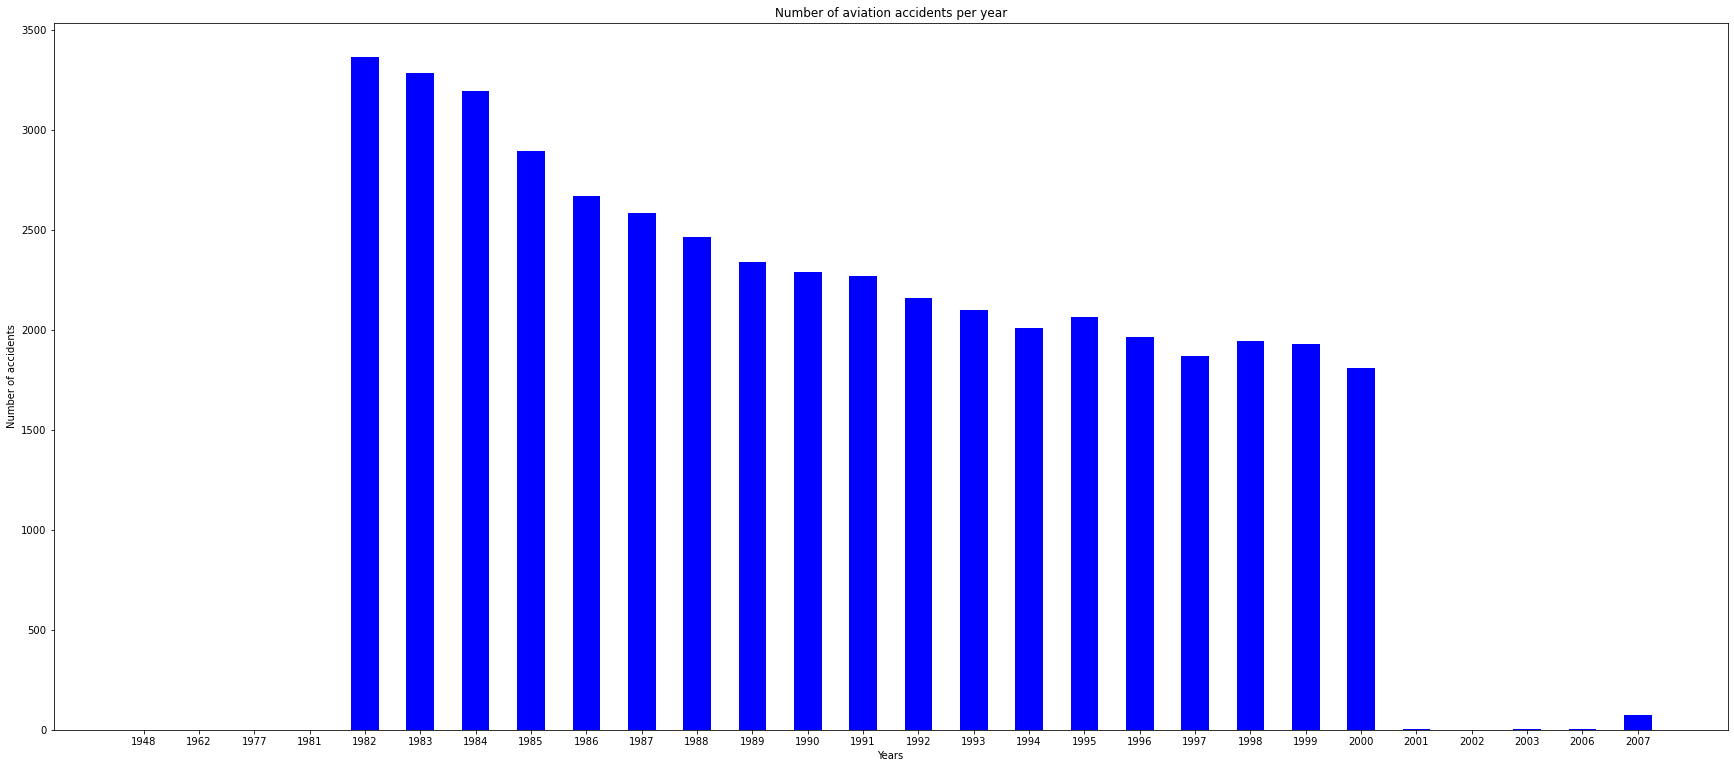

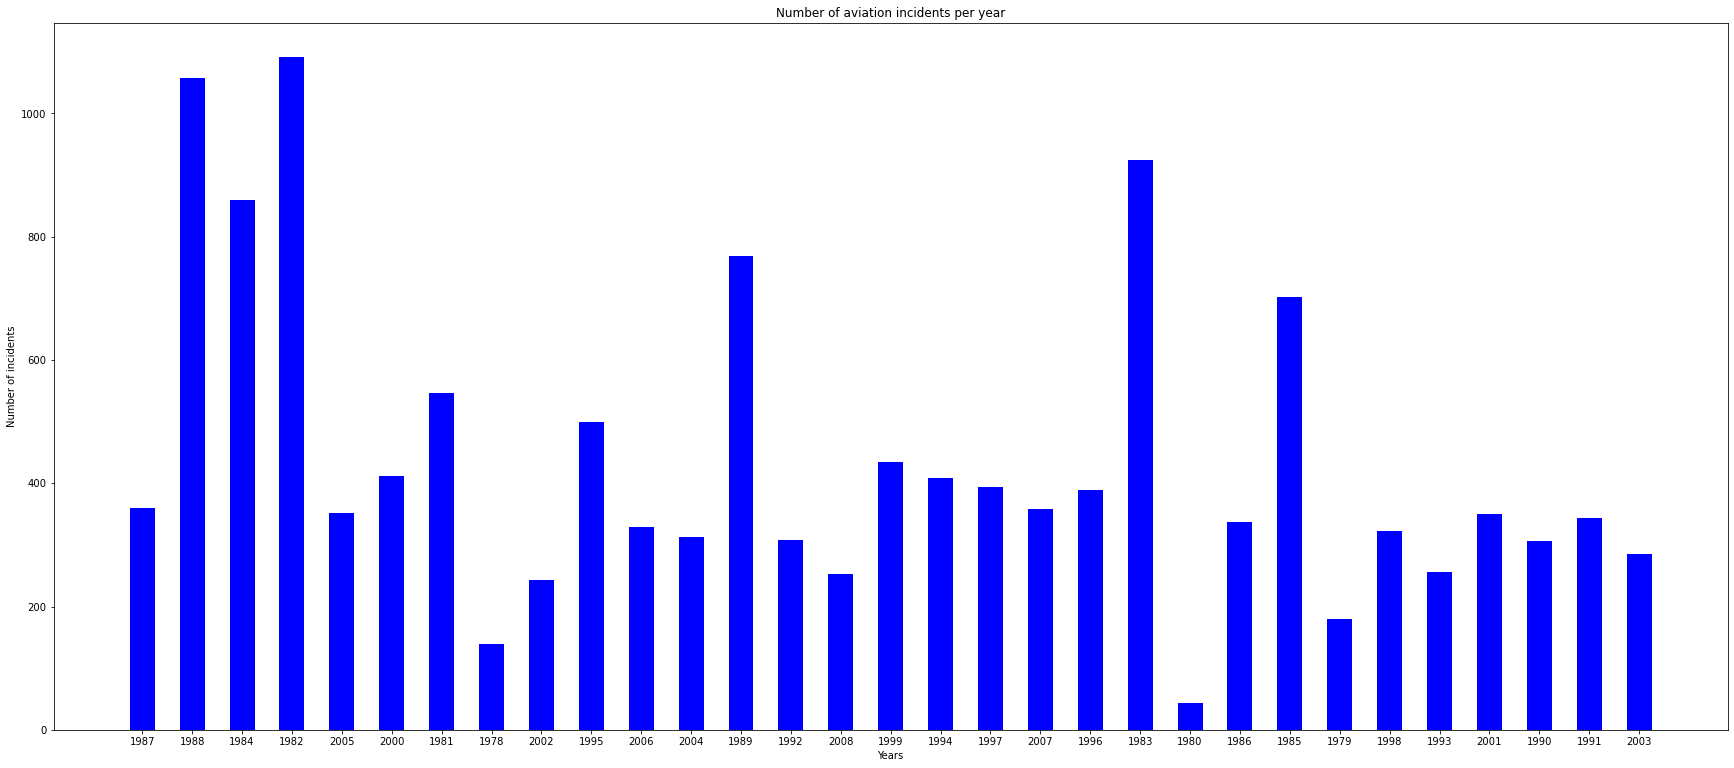

In [23]:
a1 = spark.sql("SELECT year, COUNT(*) AS num_of_accidents FROM airline_accidents GROUP BY year ORDER BY year")
a1 = a1.toPandas()

a2 = spark.sql("SELECT year, COUNT(*) AS num_of_incidents FROM airline_incidents GROUP BY year")
a2 = a2.toPandas()

display_side_by_side(a1, a2, titles=['Accidents','Incidents'])

# bar plot for accidents
fig = plt.figure(figsize = (30, 13))
plt.bar(a1['year'], a1['num_of_accidents'], color='blue', width=0.5)
plt.xlabel("Years")
plt.ylabel("Number of accidents")
plt.title("Number of aviation accidents per year")
plt.show()

# bar plot for incidents
fig = plt.figure(figsize = (30, 13))
plt.bar(a2['year'], a2['num_of_incidents'], color='blue', width=0.5)
plt.xlabel("Years")
plt.ylabel("Number of incidents")
plt.title("Number of aviation incidents per year")
plt.show()

### 2. WHERE did the aviation disasters happen?


,event_state,num_of_accidents
0,CA,5256
1,AK,3289
2,TX,3101
3,FL,3012
4,WA,1425
5,CO,1416
6,AZ,1381
7,MI,1200
8,IL,1112
9,NY,1063


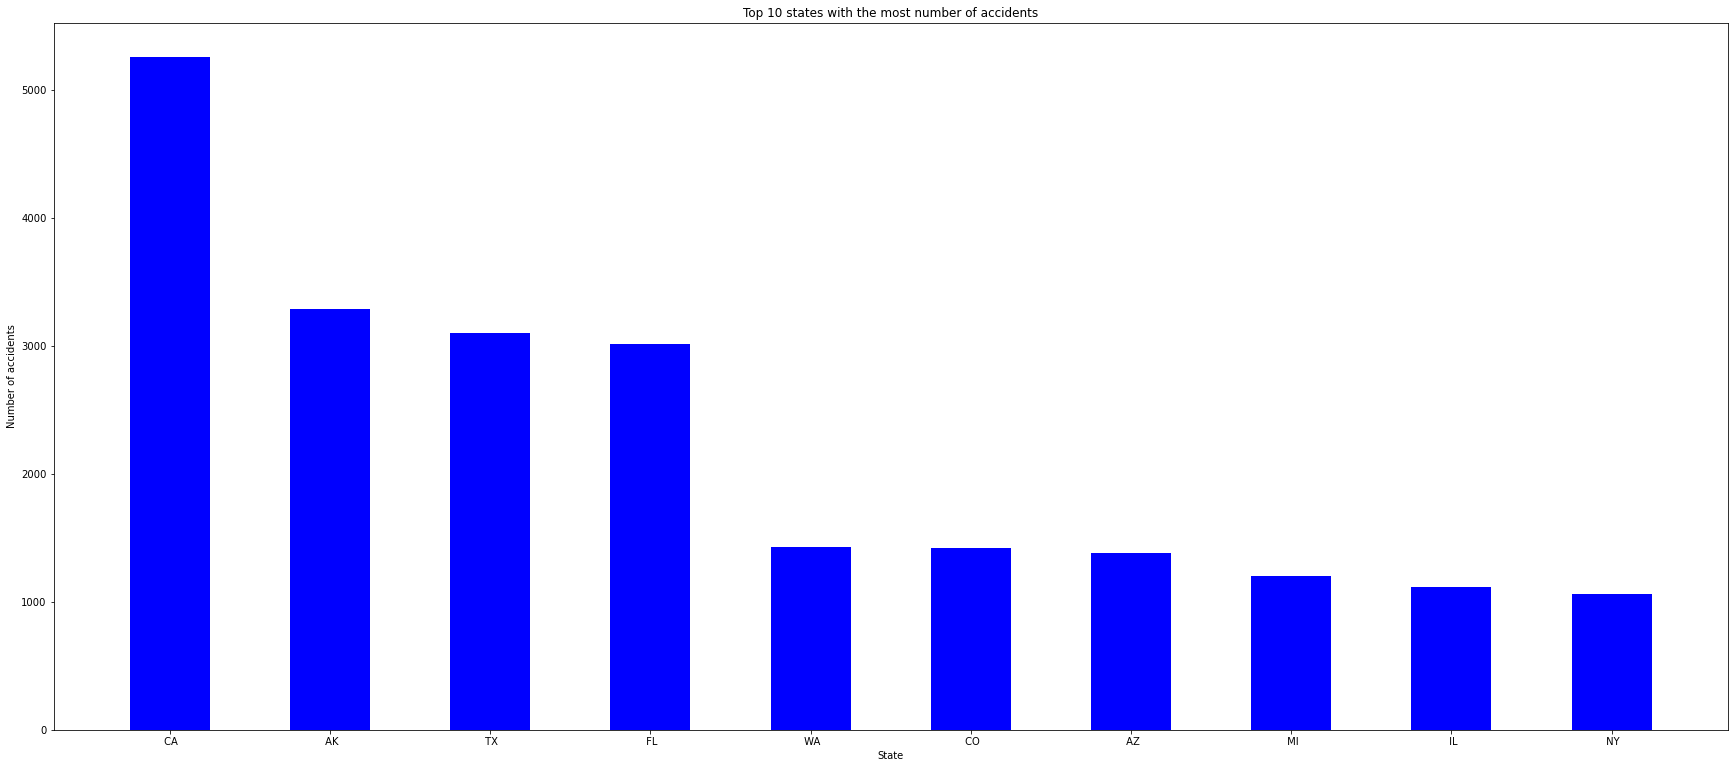

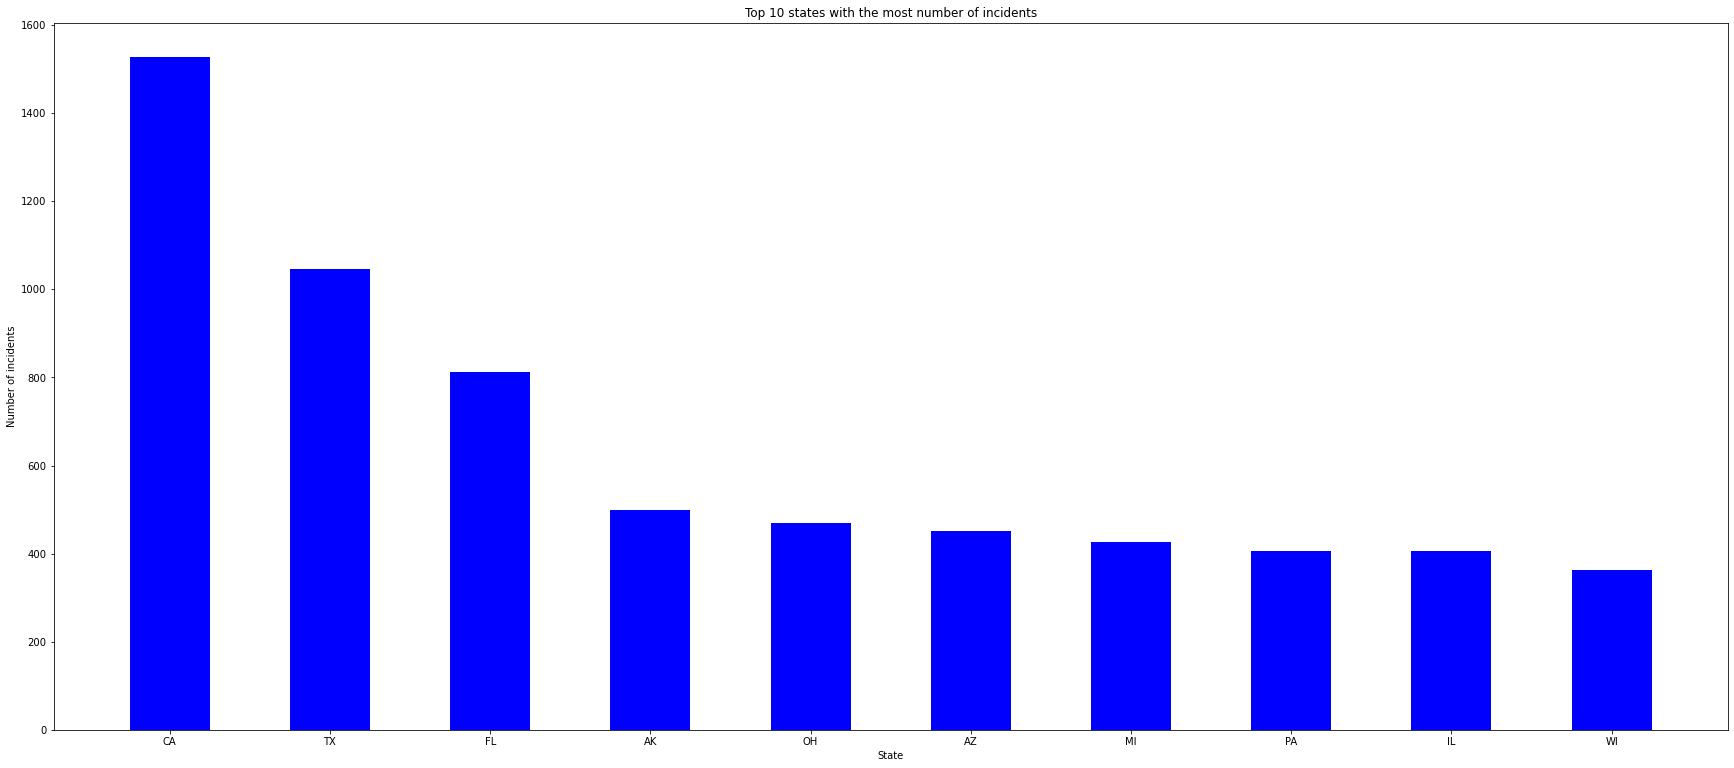

In [24]:
a1 = spark.sql("""
SELECT event_state, COUNT(*) AS num_of_accidents 
FROM airline_accidents
GROUP BY event_state 
ORDER BY num_of_accidents DESC 
LIMIT 10
""")
a1= a1.toPandas()


a2 = spark.sql("""
SELECT event_state, COUNT(*) AS num_of_incidents 
FROM airline_incidents
GROUP BY event_state 
ORDER BY num_of_incidents DESC 
LIMIT 10
""")
a2= a2.toPandas()

display_side_by_side(a1, a2, titles=['Accidents','Incidents'])

# vertical bar plot for accidents
fig = plt.figure(figsize = (30, 13))
plt.bar(a1['event_state'], a1['num_of_accidents'], color='blue', width=0.5)
plt.xlabel("State")
plt.ylabel("Number of accidents")
plt.title("Top 10 states with the most number of accidents")
plt.show()

# vertical bar plot for incidents
fig = plt.figure(figsize = (30, 13))
plt.bar(a2['event_state'], a2['num_of_incidents'], color='blue', width=0.5)
plt.xlabel("State")
plt.ylabel("Number of incidents")
plt.title("Top 10 states with the most number of incidents")
plt.show()

### 3. WHAT are the plausible factors?

#### (a) Aircraft Model

,aircraft_model,num_of_accidents
0,152,1845
1,172,868
2,172N,760
3,PA-28-140,652
4,150,597
5,172M,503
6,150M,468
7,172P,461
8,PA-18,422
9,PA-38-112,392


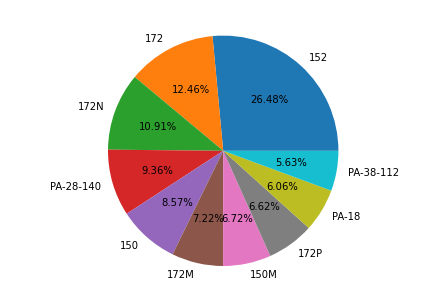

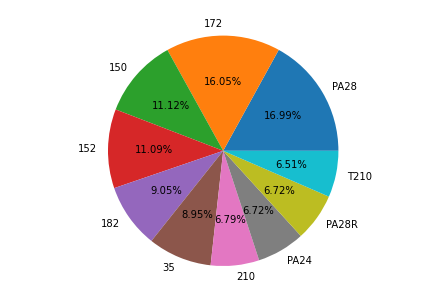

In [26]:
a1 = spark.sql("""
SELECT aircraft_model, COUNT(*) AS num_of_accidents 
FROM airline_accidents 
GROUP BY aircraft_model 
ORDER BY num_of_accidents DESC 
LIMIT 10
""")
a1 = a1.toPandas()

a2 = spark.sql("""
SELECT aircraft_model, COUNT(*) AS num_of_incidents 
FROM airline_incidents 
GROUP BY aircraft_model 
ORDER BY num_of_incidents DESC 
LIMIT 10
""")
a2 = a2.toPandas()

display_side_by_side(a1, a2, titles=['Accidents','Incidents'])

# pie chart for accidents
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(a1['num_of_accidents'], labels=a1['aircraft_model'], autopct='%1.2f%%')
plt.show()

# pie chart for incidents
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(a2['num_of_incidents'], labels=a2['aircraft_model'], autopct='%1.2f%%')
plt.show()


#### (b) Amateur-Built Aircraft

+-------------+----------------+
|amateur_built|num_of_accidents|
+-------------+----------------+
|          Yes|            3880|
|           No|           41386|
+-------------+----------------+



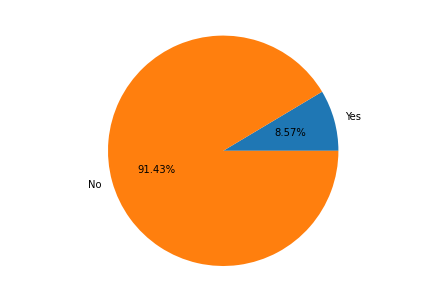

In [28]:
#### (c) Weather Condition

a1 = spark.sql("""
SELECT amateur_built, COUNT(*) AS num_of_accidents 
FROM airline_accidents 
GROUP BY amateur_built 
ORDER BY num_of_accidents
""")
a1.show()
a1 = a1.toPandas()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(a1['num_of_accidents'], labels=a1['amateur_built'], autopct='%1.2f%%')
plt.show()

#### (c) Weather Condition

,flight_plan_filed_code,num_of_accidents
0,VMC,41212
1,IMC,3588
2,UNK,466
,flight_plan_filed_code,num_of_incidents
0,NONE,6750
1,UNKNOWN,2821
2,INSTRUMENT FLIGHT RULES,2195
3,VISUAL FLIGHT RULES,1754
4,AIR TAXI FLIGHT FOLLOWING,34
5,SPECIAL VISUAL FLIGHT RULES,6


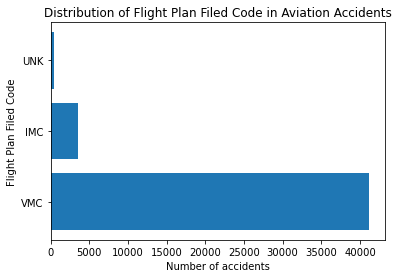

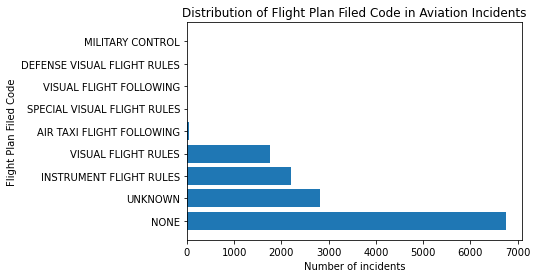

In [29]:
a1 = spark.sql("""
SELECT flight_plan_filed_code, COUNT(*) as num_of_accidents 
FROM airline_accidents
GROUP BY flight_plan_filed_code
ORDER BY num_of_accidents DESC
""")
a1 = a1.toPandas()

a2 = spark.sql("""
SELECT flight_plan_filed_code, COUNT(*) as num_of_incidents
FROM airline_incidents
GROUP BY flight_plan_filed_code
ORDER BY num_of_incidents DESC
""")
a2 = a2.toPandas()

display_side_by_side(a1, a2, titles=['Accidents','Incidents'])

# horizontal bar plot for accidents
plt.barh(a1['flight_plan_filed_code'], a1['num_of_accidents'])
plt.title('Distribution of Flight Plan Filed Code in Aviation Accidents')
plt.ylabel('Flight Plan Filed Code')
plt.xlabel('Number of accidents')
plt.show()

# horizontal bar plot for incidents
plt.barh(a2['flight_plan_filed_code'], a2['num_of_incidents'])
plt.title('Distribution of Flight Plan Filed Code in Aviation Incidents')
plt.ylabel('Flight Plan Filed Code')
plt.xlabel('Number of incidents')
plt.show()

#### (d) Flight Purpose

,purpose_of_flight,num_of_accidents
0,Personal,26788
1,Instructional,5718
2,Unknown,4121
3,Aerial Application,3038
4,Business,2787
5,Positioning,713
6,Other Work Use,585
7,Ferry,541
8,Aerial Observation,327
9,Public Aircraft,323


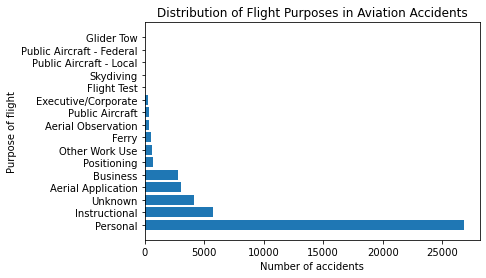

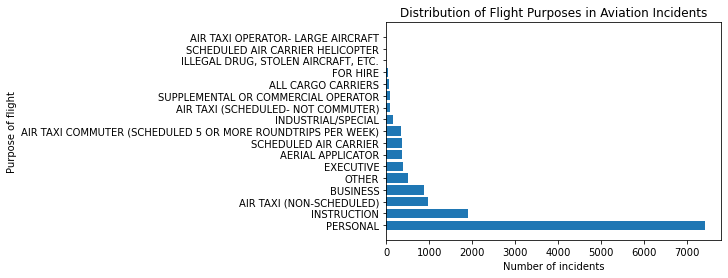

In [31]:
a1 = spark.sql("""
SELECT purpose_of_flight, COUNT(*) AS num_of_accidents 
FROM airline_accidents 
GROUP BY purpose_of_flight 
ORDER BY num_of_accidents DESC
""")
a1 = a1.toPandas()

a2 = spark.sql("""
SELECT primary_flight_type, COUNT(*) AS num_of_incidents 
FROM airline_incidents 
GROUP BY primary_flight_type 
ORDER BY num_of_incidents DESC
""")
a2 = a2.toPandas()

display_side_by_side(a1, a2, titles=['Accidents','Incidents'])

# horizontal bar plot for accidents
plt.barh(a1['purpose_of_flight'], a1['num_of_accidents'])
plt.title('Distribution of Flight Purposes in Aviation Accidents')
plt.ylabel('Purpose of flight')
plt.xlabel('Number of accidents')
plt.show()

# horizontal bar plot for incidents
plt.barh(a2['primary_flight_type'], a2['num_of_incidents'])
plt.title('Distribution of Flight Purposes in Aviation Incidents')
plt.ylabel('Purpose of flight')
plt.xlabel('Number of incidents')
plt.show()

#### (d) Pilot Experiences

In [35]:
a1 = spark.sql("""
SELECT max(pic_flight_time_total_hrs) AS max_pilot_flight_time_hrs, 
        min(pic_flight_time_total_hrs) AS min_pilot_flight_time_hrs,
        avg(pic_flight_time_total_hrs) AS avg_pilot_flight_time_hrs
FROM airline_incidents
""")
a1 = a1.toPandas()
a1

,max_pilot_flight_time_hrs,min_pilot_flight_time_hrs,avg_pilot_flight_time_hrs
0,9995,0,3563.447262


In [36]:
a2 = spark.sql("""
SELECT max(pic_flight_time_total_make_model) AS max_pilot_model_flight_time_hrs, 
    min(pic_flight_time_total_make_model) AS min_pilot_model_flight_time_hrs,
    avg(pic_flight_time_total_make_model) AS avg_pilot_model_flight_time_hrs
FROM airline_incidents
""")
a2 = a2.toPandas()
a2

,max_pilot_model_flight_time_hrs,min_pilot_model_flight_time_hrs,avg_pilot_model_flight_time_hrs
0,995,0,699.299403


#### (f) Type of Pilot

In [34]:
a1 = spark.sql("""
SELECT pic_certificate_type, COUNT(*) AS num_of_incidents
FROM airline_incidents
GROUP BY pic_certificate_type
ORDER BY num_of_incidents
""")
a1 = a1.toPandas()
a1

,pic_certificate_type,num_of_incidents
0,RECREATIONAL PILOT,3
1,PRIVATE PILOT FLIGHT INSTRUCTOR,5
2,PILOT NOT CERTIFICATED,11
3,UNKNOWN/FOREIGN,91
4,None,126
5,AIRLINE TRANSPORT PILOT FLIGHT INSTRUCTOR,680
6,STUDENT,1042
7,COMMERCIAL PILOT FLIGHT INSTRUCTOR,1416
8,AIRLINE TRANSPORT,2036
9,COMMERCIAL PILOT,3098


### 4. HOW MANY fatalities were involved? 


In [32]:
a1 = spark.sql("""
SELECT fatal_accidents, (total_accidents - fatal_accidents) AS non_fatal_accidents 
FROM (
    SELECT COUNT(*) AS fatal_accidents 
    FROM airline_accidents
    WHERE (total_fatal_injuries <> 0)
    ) AS A, 
    (
    SELECT COUNT(*) AS total_accidents
    FROM airline_accidents
    ) AS B
""")
a1 = a1.toPandas()

a2 = spark.sql("""
SELECT fatal_incidents, (total_incidents - fatal_incidents) AS non_fatal_incidents
FROM (
    SELECT COUNT(*) AS fatal_incidents
	FROM airline_incidents
	WHERE (total_fatalities <> 0)
    ) AS A,
	(
    SELECT COUNT(*) AS total_incidents FROM airline_incidents
    ) AS B
""")
a2 = a2.toPandas()

display_side_by_side(a1, a2, titles=['Accidents','Incidents'])

,fatal_accidents,non_fatal_accidents
0,8746,36520
,fatal_incidents,non_fatal_incidents
0,8,13559


### 5. WHICH flight phases were involved?


,broad_phase_of_flight,num_of_accidents
0,LANDING,11115
1,TAKEOFF,9456
2,CRUISE,7620
3,MANEUVERING,6289
4,APPROACH,4759
5,CLIMB,1417
6,TAXI,1313
7,DESCENT,1275
8,GO-AROUND,1044
9,STANDING,491


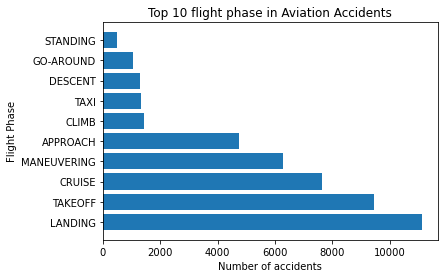

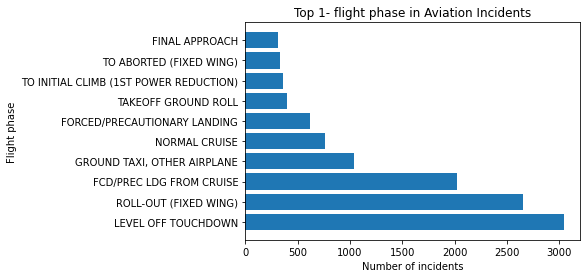

In [33]:
a1  = spark.sql("""
SELECT broad_phase_of_flight, COUNT(*) AS num_of_accidents
FROM airline_accidents 
GROUP BY broad_phase_of_flight 
ORDER BY num_of_accidents DESC
LIMIT 10
""")
a1 = a1.toPandas()

a2  = spark.sql("""
SELECT flight_phase, COUNT(*) AS num_of_incidents
FROM airline_incidents 
GROUP BY flight_phase 
ORDER BY num_of_incidents DESC
LIMIT 10
""")
a2 = a2.toPandas()

display_side_by_side(a1, a2, titles=['Accidents','Incidents'])

# horizontal bar plot for accidents
plt.barh(a1['broad_phase_of_flight'], a1['num_of_accidents'])
plt.title('Top 10 flight phase in Aviation Accidents')
plt.ylabel('Flight Phase')
plt.xlabel('Number of accidents')
plt.show()

# horizontal bar plot for incidents
plt.barh(a2['flight_phase'], a2['num_of_incidents'])
plt.title('Top 1- flight phase in Aviation Incidents')
plt.ylabel('Flight phase')
plt.xlabel('Number of incidents')
plt.show()

## Complex queries

### (1) Trends of aviation accidents and incidents by year 

,year,num_of_accidents,num_of_incidents
0,1996,1962,389
1,1997,1869,394
2,1998,1943,323
3,1999,1929,435
4,2000,1806,411
5,2001,3,350
6,2002,1,243
7,2003,2,286
8,2006,3,329
9,2007,76,358


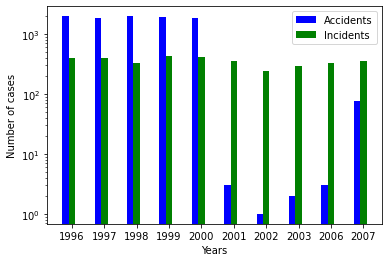

In [37]:
a1 = spark.sql("""
SELECT * 
FROM
(
SELECT A.year, num_of_accidents, num_of_incidents
FROM
(
SELECT year, COUNT(*) as num_of_accidents
FROM airline_accidents
GROUP BY year
ORDER BY year
) AS A,

(
SELECT year, COUNT(*) as num_of_incidents
FROM airline_incidents
GROUP BY year
ORDER BY year
) AS I

WHERE A.year = I.year
ORDER BY year DESC
LIMIT 10
) AS F
ORDER BY year
""")
a1 = a1.toPandas()
display(a1)

# grouped bar plot
x = np.arange(10) 
y1 = a1['num_of_accidents'].tolist()
y2 = a1['num_of_incidents'].tolist()
width = 0.2
  
plt.bar(x-0.2, y1, width, color='blue') 
plt.bar(x, y2, width, color='green') 
plt.xticks(x, a1['year'].tolist()) 
plt.xlabel("Years") 
plt.ylabel("Number of cases") 
plt.legend(["Accidents", "Incidents"]) 
plt.yscale("log")
plt.show()

Between 1996 and 2000, the rate of aviation accidents surpassed that of incidents, whereas from 2001 to 2007, the occurrence of aviation incidents exceeded that of accidents.

### (2) Aviation accidents and incidents happened each year that resulted in different severity of aircraft_damage


In [38]:
a1 = spark.sql("""
SELECT A.year, 
        LOWER(acc_aircraft_damage) AS accident_aircraft_damage, 
        num_of_accidents, LOWER(inc_aircraft_damage) AS incident_aircraft_damage, 
        num_of_incidents
FROM
(SELECT year,
        aircraft_damage AS acc_aircraft_damage, 
        COUNT(*) as num_of_accidents
FROM airline_accidents
GROUP BY aircraft_damage,year
ORDER BY year, aircraft_damage
) AS A,
(
SELECT year,
        aircraft_damage AS inc_aircraft_damage, 
        COUNT(*) AS num_of_incidents
FROM airline_incidents
GROUP BY aircraft_damage,year
ORDER BY year, aircraft_damage
) AS I
WHERE A.year = I.year AND LOWER(acc_aircraft_damage) = LOWER(inc_aircraft_damage)
ORDER BY year DESC 
""")
a1 = a1.toPandas()
display(a1)

,year,accident_aircraft_damage,num_of_accidents,incident_aircraft_damage,num_of_incidents
0,2007,substantial,54,substantial,17
1,2006,substantial,1,substantial,18
2,2006,destroyed,2,destroyed,1
3,2002,substantial,1,substantial,14
4,2001,substantial,3,substantial,17
5,2000,minor,15,minor,388
6,2000,substantial,1430,substantial,20
7,1999,substantial,1528,substantial,20
8,1999,minor,18,minor,412
9,1999,destroyed,383,destroyed,1


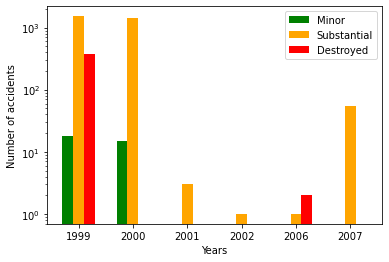

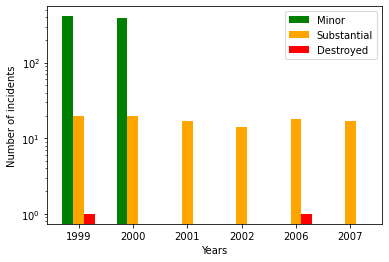

In [39]:
# grouped bar plot for accidents
x = np.arange(6) 
y1 = [18, 15, 0, 0, 0, 0] 
y2 = [1528, 1430, 3, 1, 1, 54] 
y3 = [383, 0, 0, 0, 2, 0] 
width = 0.2
 
plt.bar(x-0.2, y1, width, color='green') 
plt.bar(x, y2, width, color='orange') 
plt.bar(x+0.2, y3, width, color='red') 
plt.xticks(x, ["1999","2000","2001","2002","2006","2007"]) 
plt.xlabel("Years") 
plt.ylabel("Number of accidents") 
plt.legend(["Minor", "Substantial", "Destroyed"]) 
plt.yscale("log")
plt.show() 

# grouped bar plot for incidents
x = np.arange(6) 
y1 = [412, 388, 0, 0, 0, 0] 
y2 = [20, 20, 17, 14, 18, 17] 
y3 = [1, 0, 0, 0, 1, 0] 
width = 0.2
  
plt.bar(x-0.2, y1, width, color='green') 
plt.bar(x, y2, width, color='orange') 
plt.bar(x+0.2, y3, width, color='red') 
plt.xticks(x, ["1999","2000","2001","2002","2006","2007"]) 
plt.xlabel("Years") 
plt.ylabel("Number of incidents") 
plt.legend(["Minor", "Substantial", "Destroyed"]) 
plt.yscale("log")
plt.show()

1999 and 2000 are the years which have the most number of substantial accidents and minor incidents happening throughout the years. While the number of substantial incidents is relatively constant throughout the years, substantial accidents significantly reduced from 1999-2002 and increased from there onwards. Attention should be given to the facts that:
<br>
<br>(a) There is an upward trend of aviation accidents starting from 2002, which is an alert for necessary actions to be taken to stop it from further inclining; and
<br>
<br>(b) The number of incidents has been stagnant over the years. This might suggest that the safety precautions or risk management approaches could be more efficient. 

### (3) Cities that were involved in most aviation disasters from 1996 to 2000 
### Under which weather conditions did most of these disasters take place?


,year,event_city,num_of_accidents,num_of_incidents,total_cases
0,1982,COLUMBUS,5,2,7
1,1982,SCOTTSDALE,4,3,7
2,1982,HAWTHORNE,1,2,3
3,1982,BAKERSFIELD,5,1,6
4,1982,CASA GRANDE,3,1,4
...,...,...,...,...,...
3993,2000,PLYMOUTH,2,1,3
3994,2000,FORT COLLINS,2,1,3
3995,2000,ALBANY,1,1,2
3996,2000,MANKATO,1,2,3


,year,event_city,num_of_accidents,num_of_incidents,total_cases,top_city
0,1996,ANCHORAGE,16,3,19,TOP
1,1997,ANCHORAGE,10,2,12,TOP
2,1998,COLUMBUS,4,6,10,TOP
3,1998,LINCOLN,9,1,10,TOP
4,1999,ANCHORAGE,21,2,23,TOP
5,2000,ANCHORAGE,16,2,18,TOP


,event_city,flight_plan_filed_code,num_of_cases
0,LINCOLN,VMC,52
1,COLUMBUS,VMC,98
2,COLUMBUS,IMC,10
3,ANCHORAGE,VMC,310
4,ANCHORAGE,IMC,10
5,LINCOLN,IMC,7


,event_city,flight_plan_filed_code,num_of_cases
0,COLUMBUS,INSTRUMENT FLIGHT RULES,22
1,ANCHORAGE,INSTRUMENT FLIGHT RULES,10
2,LINCOLN,INSTRUMENT FLIGHT RULES,5
3,LINCOLN,VISUAL FLIGHT RULES,2
4,COLUMBUS,VISUAL FLIGHT RULES,5
5,ANCHORAGE,VISUAL FLIGHT RULES,25


[[{'top': {'labels': ['ANCHORAGE', 'COLUMBUS', 'LINCOLN'], 'counts': [355, 135, 66]}}], [{'ANCHORAGE': {'labels': ['ANCHORAGE|:|IMC', 'ANCHORAGE|:|VMC'], 'counts': [20, 335]}}, {'COLUMBUS': {'labels': ['COLUMBUS|:|IMC', 'COLUMBUS|:|VMC'], 'counts': [32, 103]}}, {'LINCOLN': {'labels': ['LINCOLN|:|IMC', 'LINCOLN|:|VMC'], 'counts': [12, 54]}}]]


<AxesSubplot:>

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


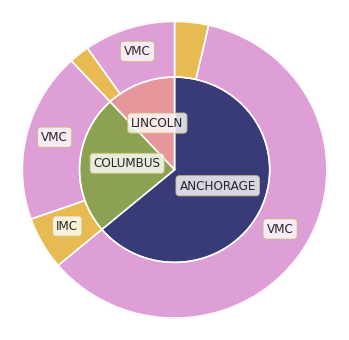

In [40]:
# create a view which consists of the number of aviation disaster happened in each city in each year
a1 = spark.sql("""
SELECT A.year, 
    A.event_city, 
    num_of_accidents, 
    num_of_incidents, 
    num_of_incidents + num_of_accidents AS total_cases
FROM

(
SELECT year, event_city, COUNT(*) AS num_of_accidents
FROM airline_accidents 
GROUP BY year, event_city
ORDER BY num_of_accidents DESC
) AS A,

(
SELECT year, event_city, COUNT(*) AS num_of_incidents
FROM airline_incidents
GROUP BY year, event_city
ORDER BY num_of_incidents DESC
) AS I

WHERE (A.year = I.year) AND (A.event_city = I.event_city)
ORDER BY year
""")
a1.createOrReplaceTempView("states_aviation_disasters")
a1 = a1.toPandas()
display(a1)


# selecting the state with the top number of aviation cases for each year
a2 = spark.sql("""
SELECT * 
FROM

(
SELECT year, event_city, num_of_accidents, num_of_incidents, total_cases, 
(CASE 


 WHEN total_cases = (SELECT MAX(total_cases)
					FROM states_aviation_disasters
					where year = 1996) AND year = 1996 THEN 'TOP'

 WHEN total_cases = (SELECT MAX(total_cases)
					FROM states_aviation_disasters
					where year = 1997) AND year = 1997 THEN 'TOP'

 WHEN total_cases = (SELECT MAX(total_cases)
					FROM states_aviation_disasters
					where year = 1998) AND year = 1998 THEN 'TOP'

 WHEN total_cases = (SELECT MAX(total_cases)
					FROM states_aviation_disasters
					where year = 1999) AND year = 1999 THEN 'TOP'

 
 WHEN total_cases = (SELECT MAX(total_cases)
					FROM states_aviation_disasters
					where year = 2000) AND year = 2000 THEN 'TOP'


 WHEN total_cases = (SELECT MAX(total_cases)
					FROM states_aviation_disasters
					where year = 2001) AND year = 2001 THEN 'TOP'

 WHEN total_cases = (SELECT MAX(total_cases)
					FROM states_aviation_disasters
					where year = 2002) AND year = 2002 THEN 'TOP'

 WHEN total_cases = (SELECT MAX(total_cases)
					FROM states_aviation_disasters
					where year = 2003) AND year = 2003 THEN 'TOP'
 
 WHEN total_cases = (SELECT MAX(total_cases)
					FROM states_aviation_disasters
					where year = 2004) AND year = 2004 THEN 'TOP'
 
 WHEN total_cases = (SELECT MAX(total_cases)
					FROM states_aviation_disasters
					where year = 2005) AND year = 2005 THEN 'TOP'

 ELSE 'NONE'
END) top_city
FROM states_aviation_disasters
ORDER BY year DESC
) AS V1

WHERE top_city = 'TOP'
ORDER BY year;
""")
a2 = a2.toPandas()
display(a2)


# dig deeper about the relationship between the avaition disaster 'hot spots' and the weather conditions
a3 = spark.sql("""
SELECT event_city,flight_plan_filed_code, COUNT(*) AS num_of_cases
FROM
(SELECT event_city, flight_plan_filed_code
FROM airline_accidents 
WHERE (event_city = 'ANCHORAGE' OR event_city = 'COLUMBUS' OR event_city = 'LINCOLN') AND (flight_plan_filed_code = 'IMC' OR flight_plan_filed_code = 'VMC')) AS V1
GROUP BY event_city, flight_plan_filed_code
""")
a3 = a3.toPandas() #used to create the nested pie plot below
display(a3)

a4 = spark.sql("""
SELECT event_city, flight_plan_filed_code, COUNT(*) AS num_of_cases
FROM
(SELECT event_city, flight_plan_filed_code
FROM airline_incidents 
WHERE (event_city = 'ANCHORAGE' OR event_city = 'COLUMBUS' OR event_city = 'LINCOLN') AND (flight_plan_filed_code = 'VISUAL FLIGHT RULES' OR flight_plan_filed_code = 'INSTRUMENT FLIGHT RULES')) AS V1
GROUP BY event_city, flight_plan_filed_code;
""")
a4 = a4.toPandas()
display(a4) #used to create the nested pie plot below


# nested pie chart
import pandas as pd
import omniplot.plot as op
import matplotlib.pyplot as plt

df = pd.DataFrame([['ANCHORAGE', 'IMC', 20],
                   ['ANCHORAGE', 'VMC', 335],
                   ['COLUMBUS', 'IMC', 32],
                   ['COLUMBUS', 'VMC', 103],
                   ['LINCOLN', 'IMC', 12],
                   ['LINCOLN', 'VMC', 54]])
df.columns = ['event_city', 'weather_condition', 'counts']
op.nested_piechart(df=df, category=['event_city', 'weather_condition'], variable="counts")
# optionally plt.savefig("test.png") or plt.show()


We can observe that ANCHORAGE was the city that was involved in most aviation disasters in most of the years, with its peak occurred at the year of 1999. This suggests that ANCHORGE is a 'hot spot' for aviation disasters. This calls for conducting risk assessments to assess the underlying reasons behind this observation. 

Looking at the nested pie plot, observe that a large portion of the aviation took place under a VSM(Visual et al., the vision is clear) suggests that the contributing factor might not be the weather conditions of each region but other factors like the pilot experiences, reliability of the aircraft engines and so on. This also suggests that flying by reference to flight instruments is more reliable than the visions. 

### (4) Robustness of aircraft_make

In [41]:
# ranking the aircraft_make according to their robustness
# robustness in this case is defined as (num_of_minor_cases / (num_of_minor_cases + num_of_substantial_cases + num_of_destoyed_cases) * 100) that the aircraft make involved
# if the percentage is high, meaning most of the disasters that the aircraft_make involved resulted only in minor damage of the aircraft, suggesting it is a more robust kind of material
a1 = spark.sql("""
SELECT 
	aircraft_make,
	minor_accidents,
	minor_incidents,
	total_minor_cases,
	grand_total_cases,
	percentage,
	RANK() OVER(
		ORDER BY percentage DESC
	) robustness_ranking
FROM

(SELECT 
	V1.aircraft_make,
	V1.minor_accidents,
	V1.minor_incidents,
	total_minor_cases,
	grand_total_cases,
	(((total_minor_cases + 0.0) / grand_total_cases) * 100) AS percentage
FROM
(
SELECT C.aircraft_make, minor_accidents, minor_incidents, (minor_accidents + minor_incidents) AS total_minor_cases
FROM
(SELECT UPPER(aircraft_make) AS aircraft_make, COUNT(*) AS minor_accidents
FROM
(SELECT * 
FROM airline_accidents
WHERE (aircraft_damage = 'Minor') AND (injury_severity = 'Non-Fatal')) AS A
GROUP BY UPPER(aircraft_make)
ORDER BY minor_accidents DESC) AS C, 
(SELECT UPPER(aircraft_make) AS aircraft_make, COUNT(*) AS minor_incidents
FROM
(SELECT * 
FROM airline_incidents
WHERE (aircraft_damage = 'MINOR') and (total_fatalities = 0)) AS A
GROUP BY UPPER(aircraft_make)
ORDER BY minor_incidents DESC) AS D
WHERE C.aircraft_make = D.aircraft_make
ORDER BY total_minor_cases DESC
) AS V1,

(
SELECT A.aircraft_make, minor_accidents, minor_incidents, (minor_accidents + minor_incidents) AS grand_total_cases
FROM

(SELECT aircraft_make, COUNT(*) AS minor_accidents
FROM airline_accidents
GROUP BY aircraft_make
ORDER BY "minor_accidents" DESC) AS A,

(SELECT aircraft_make, COUNT(*) AS minor_incidents
FROM airline_incidents
WHERE aircraft_damage IN ('DESTROYED', 'MINOR', 'SUBSTANTIAL')
GROUP BY aircraft_make
ORDER BY "minor_incidents" DESC) AS I

WHERE A.aircraft_make = I.aircraft_make
) AS V2

WHERE (V1.aircraft_make = V2.aircraft_make)
ORDER BY percentage DESC) AS Z;
""")
a1 = a1.toPandas()
display(a1)

,aircraft_make,minor_accidents,minor_incidents,total_minor_cases,grand_total_cases,percentage,robustness_ranking
0,ULTIMATE,1,1,2,2,100.0000000000000,1
1,DASSAULT,1,31,32,41,78.0487804878049,2
2,BUSHBY,1,10,11,17,64.7058823529412,3
3,DOUGLAS,4,125,129,211,61.1374407582938,4
4,FOKKER,1,13,14,23,60.8695652173913,5
5,DE HAVILLAND,5,54,59,98,60.2040816326531,6
6,SWEARINGEN,4,92,96,165,58.1818181818182,7
7,GULFSTREAM,1,50,51,88,57.9545454545455,8
8,MOONEY,3,617,620,1215,51.0288065843621,9
9,CONVAIR,1,16,17,34,50.0000000000000,10


### (5) Pilots’ overall flight experiences and model-specific experiences under bad weather condition. 

In [42]:
# calculate the average pilot flight time and average model flight time of the pilots that are driving each aircraft model
# order by pilot average flight time
a1 = spark.sql("""
SELECT * 
FROM

(SELECT V1.aircraft_model, V1.flight_plan_filed_code, num_of_events, avg_flight_time, avg_model_flight_time, avg_model_experience
FROM

(SELECT aircraft_model, flight_plan_filed_code, COUNT(*) AS num_of_events
FROM airline_incidents
WHERE (flight_plan_filed_code = 'VISUAL FLIGHT RULES') OR (flight_plan_filed_code = 'INSTRUMENT FLIGHT RULES')
GROUP BY aircraft_model, flight_plan_filed_code
ORDER BY num_of_events DESC) AS V1,

(SELECT aircraft_model, flight_plan_filed_code, AVG(pic_flight_time_total_hrs) AS avg_flight_time, AVG(pic_flight_time_total_make_model) AS avg_model_flight_time, AVG(model_experience) AS avg_model_experience
FROM

(SELECT aircraft_model, flight_plan_filed_code, pic_flight_time_total_hrs, pic_flight_time_total_make_model, (((pic_flight_time_total_make_model + 0.0) / pic_flight_time_total_hrs) * 100) AS model_experience
FROM airline_incidents
WHERE (pic_flight_time_total_hrs <> 0) AND ( (flight_plan_filed_code = 'VISUAL FLIGHT RULES') OR (flight_plan_filed_code = 'INSTRUMENT FLIGHT RULES'))) AS A

GROUP BY aircraft_model, flight_plan_filed_code) AS V2

WHERE (V1.aircraft_model = V2.aircraft_model) AND (V1.flight_plan_filed_code = V2.flight_plan_filed_code)) AS Z

WHERE (flight_plan_filed_code = 'INSTRUMENT FLIGHT RULES')
ORDER BY avg_flight_time DESC
LIMIT 10
""")
a1 = a1.toPandas()


# order by pilot overage model-specific flight time, i.e., how much time on average do the pilots get trained on flying a specific aircraft model
a2 = spark.sql("""
SELECT * 
FROM

(SELECT V1.aircraft_model, V1.flight_plan_filed_code, num_of_events, avg_flight_time, avg_model_flight_time, avg_model_experience
FROM

(SELECT aircraft_model, flight_plan_filed_code, COUNT(*) AS num_of_events
FROM airline_incidents
WHERE (flight_plan_filed_code = 'VISUAL FLIGHT RULES') OR (flight_plan_filed_code = 'INSTRUMENT FLIGHT RULES')
GROUP BY aircraft_model, flight_plan_filed_code
ORDER BY num_of_events DESC) AS V1,

(SELECT aircraft_model, flight_plan_filed_code, AVG(pic_flight_time_total_hrs) AS avg_flight_time, AVG(pic_flight_time_total_make_model) AS avg_model_flight_time, AVG(model_experience) AS avg_model_experience
FROM

(SELECT aircraft_model, flight_plan_filed_code, pic_flight_time_total_hrs, pic_flight_time_total_make_model, (((pic_flight_time_total_make_model + 0.0) / pic_flight_time_total_hrs) * 100) AS model_experience
FROM airline_incidents
WHERE (pic_flight_time_total_hrs <> 0) AND ( (flight_plan_filed_code = 'VISUAL FLIGHT RULES') OR (flight_plan_filed_code = 'INSTRUMENT FLIGHT RULES'))) AS A

GROUP BY aircraft_model, flight_plan_filed_code) AS V2

WHERE (V1.aircraft_model = V2.aircraft_model) AND (V1.flight_plan_filed_code = V2.flight_plan_filed_code)) AS Z

WHERE (flight_plan_filed_code = 'INSTRUMENT FLIGHT RULES')
ORDER BY avg_model_experience DESC
LIMIT 10
""")
a2 = a2.toPandas()

display_side_by_side(a1, a2, titles=['avg_flight_time','avg_model_experience'])


,aircraft_model,flight_plan_filed_code,num_of_events,avg_flight_time,avg_model_flight_time,avg_model_experience
0,720,INSTRUMENT FLIGHT RULES,1,30000.000000,6000.000000,20.000000
1,195,INSTRUMENT FLIGHT RULES,1,23000.000000,25.000000,0.108696
2,DH114,INSTRUMENT FLIGHT RULES,1,20309.000000,10739.000000,52.878034
3,MD90,INSTRUMENT FLIGHT RULES,1,18000.000000,5410.000000,30.055556
4,31,INSTRUMENT FLIGHT RULES,2,17050.000000,527.500000,2.747340
5,747,INSTRUMENT FLIGHT RULES,21,17021.850000,1946.750000,15.925618
6,CL600 2C10,INSTRUMENT FLIGHT RULES,2,17000.000000,1100.000000,6.470588
7,377,INSTRUMENT FLIGHT RULES,1,17000.000000,1300.000000,7.647059
8,767,INSTRUMENT FLIGHT RULES,12,15878.272727,2456.636364,14.676010
9,DC6,INSTRUMENT FLIGHT RULES,3,15858.333333,6766.666667,45.030508


avg_flight_time
<br>The pilots had way higher avg_flight_time but way lower average model flight time than the avg_model_experience. 
<br>
<br>avg_model_experience
<br>The pilots had way higher average_model_exoerinece but way lower avg_flight_time than the avg_flight_time.

Combining both observations suggest that the pilot training program should emphasise uplifting the threshold of flight time in pilot training courses before the learners can be granted a license to become a qualified pilot and also implement model-specific training for pilots to ensure they are familiar with the mechanism of the aircraft model that varies from model to model.

### CRUD operations

In [43]:
# the event_type of this record should be 'Accident' before the update operation
old = spark.sql("""
SELECT * FROM airline_accidents
WHERE event_id = '20070503X00507';
""")
old = old.toPandas()
display(old)

,event_id,event_type,country,injury_severity,aircraft_damage,aircraft_make,aircraft_model,amateur_built,number_of_engines,engine_type,...,total_serious_injuries,total_minor_injuries,total_uninjured,flight_plan_filed_code,broad_phase_of_flight,event_city,event_state,year,month,day
0,20070503X00507,Accident,United States,Fatal(1),Substantial,Piper Aircraft,PA-38-112,No,1,Reciprocating,...,0,0,0,VMC,CRUISE,Dawsonville,GA,2007,04,26


In [44]:
from pyspark.sql.functions import col, when
valueWhenTrue = 'Incident'  # for example

df1 = df1.withColumn(
    "event_type",
    when(
        col("event_id") == '20070503X00507',
        valueWhenTrue
    ).otherwise(col("event_type"))
)
df1a = df1

In [54]:
df1b = df1.toPandas()
df1b

,event_id,event_type,country,injury_severity,aircraft_damage,aircraft_make,aircraft_model,amateur_built,number_of_engines,engine_type,...,total_serious_injuries,total_minor_injuries,total_uninjured,flight_plan_filed_code,broad_phase_of_flight,event_city,event_state,year,month,day
0,20070503X00507,Incident,United States,Fatal(1),Substantial,Piper Aircraft,PA-38-112,No,1,Reciprocating,...,0,0,0,VMC,CRUISE,Dawsonville,GA,2007,04,26
1,20010110X00084,Accident,United States,Fatal(2),Destroyed,Champion,8GCBC,No,1,Reciprocating,...,0,0,0,VMC,UNKNOWN,JUNEAU,AK,2000,12,27
2,20010114X00298,Accident,United States,Non-Fatal,Destroyed,Evans Aircraft,VARIEZE,Yes,1,Unknown,...,0,1,0,VMC,TAKEOFF,INGLESIDE,TX,2000,12,09
3,20001212X22325,Accident,United States,Non-Fatal,Substantial,Beech,A-36,No,1,Reciprocating,...,0,0,3,VMC,CRUISE,MILLERSBURG,OH,2000,11,01
4,20001212X21937,Accident,United States,Non-Fatal,Substantial,Cessna,172,No,1,Reciprocating,...,0,0,3,VMC,GO-AROUND,BUFFALO,MO,2000,09,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45261,20020917X02918,Accident,United States,Non-Fatal,Substantial,PIPER,PA-22-150,No,1,Reciprocating,...,0,0,2,VMC,TAKEOFF,HARRISON,MI,1982,05,15
45262,20020917X03642,Accident,United States,Non-Fatal,Substantial,BEECH,A24R,No,1,Reciprocating,...,0,2,1,VMC,APPROACH,CAMARILLO,CA,1982,05,01
45263,20020917X01654,Accident,United States,Fatal(3),Destroyed,HUGHES,369D,No,1,Turbo Shaft,...,0,0,0,VMC,CRUISE,NEAR TANANA,AK,1982,04,11
45264,20020917X02446,Accident,United States,Non-Fatal,Substantial,PIPER,PA-60/601P,No,2,Reciprocating,...,0,0,3,IMC,LANDING,CARROLL,IA,1982,02,23


In [45]:
df1a.createOrReplaceTempView("airline_accidents")

In [46]:
# verifying if the value of event_type has been updated from 'Accident' to 'Incident'
new = spark.sql("""
SELECT * FROM airline_accidents
WHERE event_id = '20070503X00507';
""")
new = new.toPandas()
display(new)

,event_id,event_type,country,injury_severity,aircraft_damage,aircraft_make,aircraft_model,amateur_built,number_of_engines,engine_type,...,total_serious_injuries,total_minor_injuries,total_uninjured,flight_plan_filed_code,broad_phase_of_flight,event_city,event_state,year,month,day
0,20070503X00507,Incident,United States,Fatal(1),Substantial,Piper Aircraft,PA-38-112,No,1,Reciprocating,...,0,0,0,VMC,CRUISE,Dawsonville,GA,2007,04,26


In [48]:
# redefine the schema of the airline_accidents as we dropped some unnecessary columns from the original table before
airline_accidents_updated = StructType([\
		StructField("event_id", StringType(), False), \
		StructField("event_type", StringType(), True), \
        StructField("country", StringType(), True), \
		StructField("injury_severity", StringType(), True), \
                                        
		StructField("aircraft_damage", StringType(), True), \
		StructField("aircraft_make", StringType(), True), \
		StructField("aircraft_model", StringType(), True), \
		StructField("amateur_built", StringType(), True), \
		StructField("number_of_engines", StringType(), True), \
                                        
		StructField("engine_type", StringType(), True), \
		StructField("purpose_of_flight", StringType(), True), \
		StructField("total_fatal_injuries", IntegerType(), True), \
		StructField("total_serious_injuries", IntegerType(), True), \
		StructField("total_minor_injuries", IntegerType(), True), \
                                        
		StructField("total_uninjured", IntegerType(), True), \
		StructField("flight_plan_filed_code", StringType(), True), \
		StructField("broad_phase_of_flight", StringType(), True), \
        StructField("event_city", StringType(), True), \
        StructField("event_state", StringType(), True), \
                                        
        StructField("year", IntegerType(), True), \
        StructField("month", IntegerType(), True), \
        StructField("day", IntegerType(), True), \
	])

In [55]:
df1.coalesce(1).write.mode('overwrite').option('header','true').csv('hdfs://namenode:8020/infs3208/airline_accidents_updated.csv')

path_new = "hdfs://namenode:8020/infs3208/airline_accidents_updated.csv"
df_new = spark.read.option("header", True).schema(airline_accidents_updated).csv(path_new) ##after this line, the airline_accidents_updated.csv should appear in the infd3208 directory of the Hadoop 
#df1.show(truncate=False)
#df1.printSchema()

df_new.createOrReplaceTempView("airline_accidents_updated")
updated = spark.sql("""
SELECT * FROM airline_accidents_updated
WHERE event_id = '20070503X00507';
""")
updated = updated.toPandas()
display(updated)

,event_id,event_type,country,injury_severity,aircraft_damage,aircraft_make,aircraft_model,amateur_built,number_of_engines,engine_type,...,total_serious_injuries,total_minor_injuries,total_uninjured,flight_plan_filed_code,broad_phase_of_flight,event_city,event_state,year,month,day
0,20070503X00507,Incident,United States,Fatal(1),Substantial,Piper Aircraft,PA-38-112,No,1,Reciprocating,...,0,0,0,VMC,CRUISE,Dawsonville,GA,2007,4,26


                                                    -- the end --